References:
https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c

https://www.kaggle.com/datasets/kazanova/sentiment140?resource=download


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score

In [ ]:
text = ['Hello my name is the the the shruti','today is my day the the the']
coun_vect = CountVectorizer(lowercase=False,stop_words= ["is"],max_df=1,max_features = 3)
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()
# count_array
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
df


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Hello,day,name
0,1,0,1
1,0,1,0


Twitter Dataset

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

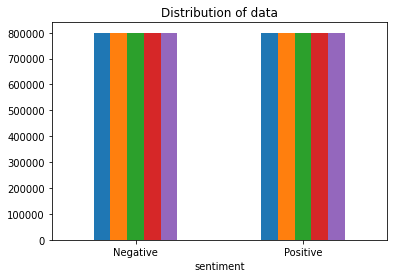

In [ ]:
# Importing the dataset

DATASET_COLUMNS=['sentiment','ids','date','flag','user','text']
df = pd.read_csv('drive/MyDrive/ML_Lab/Lab6/training.1600000.processed.noemoticon.csv',  encoding="latin", names=DATASET_COLUMNS)

df["sentiment"] = df["sentiment"].replace(4,1)

ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

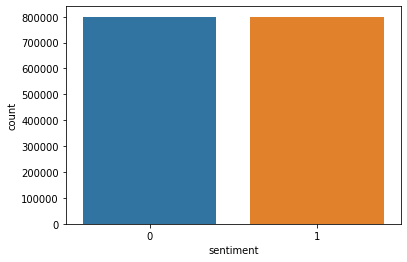

In [ ]:
# plotting the data using countplot

sns.countplot(x="sentiment",data=df)

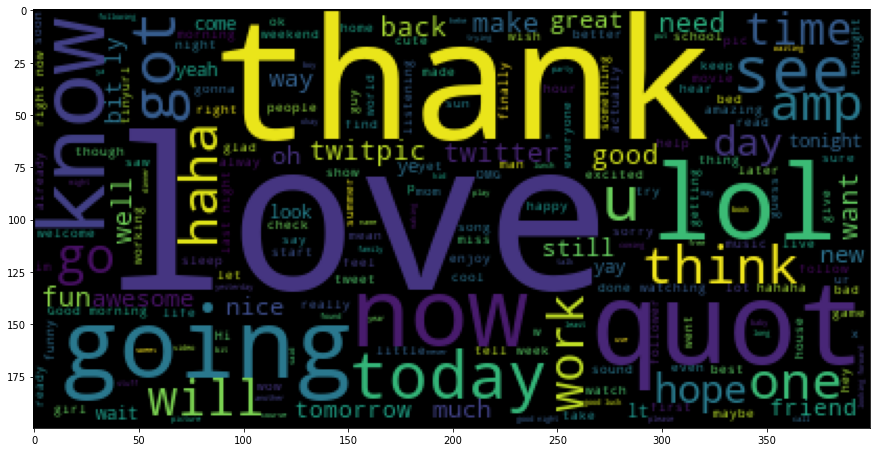

In [ ]:
#creating a string of positive tweets to analyze the words
positive_tweets = df[df['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

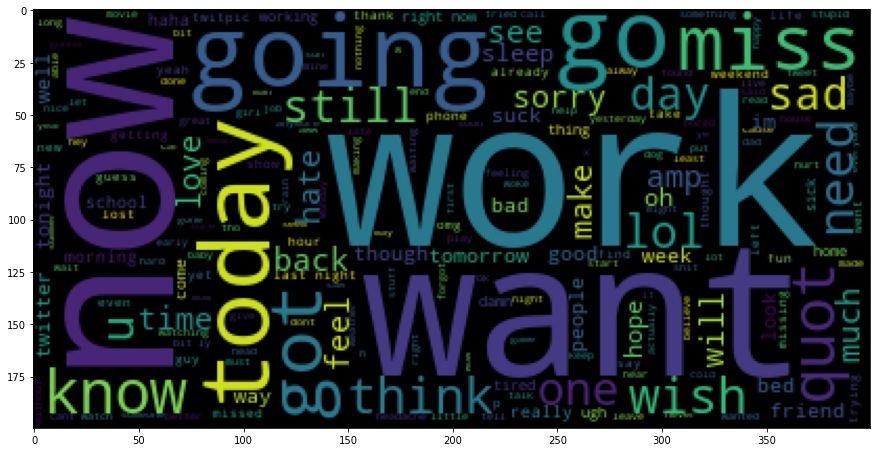

In [ ]:
# creating the string of negative tweets to analyze the words
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

In [ ]:
#preprocessing

#remove url
# def cleaning_URLs(data):
#     return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
# df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))

# #stopwordlist
# stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
#              'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
#              'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
#              'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
#              'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
#              'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
#              'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
#              'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
#              'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
#              't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
#              'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
#              'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
#              'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
#              'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
#              "youve", 'your', 'yours', 'yourself', 'yourselves']

coun_vect = CountVectorizer(max_df=1000,max_features = 200)
count_matrix = coun_vect.fit_transform(df['text'])
count_array = count_matrix.toarray()
df_ = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
df_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,09,21,2morrow,4th,abt,access,accident,across,addicted,...,voted,walked,wash,waste,wee,weight,weren,winter,workin,worries
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1599996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1599997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1599998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X= df_
y= df["sentiment"]
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)
X_train
# y_train

,000,09,21,2morrow,4th,abt,access,accident,across,addicted,...,voted,walked,wash,waste,wee,weight,weren,winter,workin,worries
177690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1378251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1201868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
521390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# multinomial naive bayes
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2682, 37418],
       [ 1424, 38476]])

In [ ]:
precision_score(y_test, y_pred), accuracy_score(y_test,  y_pred), recall_score(y_test,  y_pred), f1_score(y_test,  y_pred)

(0.5069702479774422, 0.514475, 0.9643107769423559, 0.6645594763113805)

In [ ]:
# Decisiontree classifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2899, 37201],
       [ 1623, 38277]])

In [ ]:
precision_score(y_test, y_pred), accuracy_score(y_test,  y_pred), recall_score(y_test,  y_pred), f1_score(y_test,  y_pred)

(0.5071279048199475, 0.5147, 0.9593233082706767, 0.6635060410130181)

In [ ]:
#logistic Regression

classifier = LogisticRegression(random_state=104)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2900, 37200],
       [ 1631, 38269]])

In [ ]:
for i in range(len(y_pred)):
  if(y_pred[i]>0.5):
    y_pred[i] = 1
  else:
    y_pred[i] = 0
precision_score(y_test, y_pred), accuracy_score(y_test,  y_pred), recall_score(y_test,  y_pred), f1_score(y_test,  y_pred)

(0.5070823781950204, 0.5146125, 0.9591228070175438, 0.6634191160537058)